## 1. Setup & Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Utilities
import warnings
from pathlib import Path

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load Datasets

In [2]:
# Define data directory
DATA_DIR = Path('dataset')

# Load datasets
print("Loading datasets...\n")

# 1. Airline Delay Causes
df_delays = pd.read_csv(DATA_DIR / 'Airline_Delay_Cause.csv')
print(f"✅ Delay Causes: {df_delays.shape[0]:,} rows × {df_delays.shape[1]} columns")

# 2. Flight Pricing Data
df_pricing = pd.read_csv(DATA_DIR / 'airlines_flights_data.csv')
print(f"✅ Flight Pricing: {df_pricing.shape[0]:,} rows × {df_pricing.shape[1]} columns")

# 3. Monthly Passengers
df_passengers = pd.read_csv(DATA_DIR / 'monthly_passengers.csv')
print(f"✅ Monthly Passengers: {df_passengers.shape[0]:,} rows × {df_passengers.shape[1]} columns")

# 4. Airports Metadata
df_airports = pd.read_csv(DATA_DIR / 'airports.csv')
print(f"✅ Airports: {df_airports.shape[0]:,} rows × {df_airports.shape[1]} columns")

# 5. Airlines Lookup
df_airlines = pd.read_csv(DATA_DIR / 'airlines.csv')
print(f"✅ Airlines: {df_airlines.shape[0]:,} rows × {df_airlines.shape[1]} columns")

# 6. Global Holidays
df_holidays = pd.read_csv(DATA_DIR / 'global_holidays.csv')
print(f"✅ Global Holidays: {df_holidays.shape[0]:,} rows × {df_holidays.shape[1]} columns")

# 7. Weather Data
df_weather = pd.read_csv(DATA_DIR / 'GlobalWeatherRepository.csv')
print(f"✅ Weather Data: {df_weather.shape[0]:,} rows × {df_weather.shape[1]} columns")

print("\n🎉 All datasets loaded successfully!")

Loading datasets...

✅ Delay Causes: 171,666 rows × 21 columns
✅ Flight Pricing: 300,153 rows × 12 columns
✅ Monthly Passengers: 7,242 rows × 7 columns
✅ Airports: 322 rows × 7 columns
✅ Airlines: 14 rows × 2 columns
✅ Global Holidays: 44,393 rows × 5 columns
✅ Weather Data: 107,963 rows × 41 columns

🎉 All datasets loaded successfully!


## 3. Dataset Overview & Structure

### 3.1 Airline Delay Causes

In [3]:
print("=" * 80)
print("AIRLINE DELAY CAUSES DATASET")
print("=" * 80)

print("\n📊 Dataset Info:")
print(df_delays.info())

print("\n📈 First 5 Rows:")
display(df_delays.head())

print("\n📉 Statistical Summary:")
display(df_delays.describe())

print("\n🔍 Missing Values:")
missing = df_delays.isnull().sum()
missing_pct = (missing / len(df_delays)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing[missing > 0],
    'Percentage': missing_pct[missing > 0]
})
if len(missing_df) > 0:
    display(missing_df.sort_values('Percentage', ascending=False))
else:
    print("✅ No missing values!")

print("\n🏢 Unique Values:")
print(f"  - Carriers: {df_delays['carrier'].nunique()}")
print(f"  - Airports: {df_delays['airport'].nunique()}")
print(f"  - Years: {sorted(df_delays['year'].unique())}")
print(f"  - Months: {sorted(df_delays['month'].unique())}")

AIRLINE DELAY CAUSES DATASET

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         1

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0



📉 Statistical Summary:


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171426.000000,171223.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
mean,2018.551361,6.493633,362.528467,66.434387,20.796615,2.250347,19.381147,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,992.894662,179.540694,50.315176,7.314252,61.675244,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,50.000000,6.000000,2.160000,0.000000,1.000000,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,100.000000,17.000000,6.400000,0.400000,3.910000,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.260000,1.860000,11.710000,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.000000,438783.00000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000



🔍 Missing Values:


,Missing Count,Percentage
arr_del15,443,0.258059
arr_flights,240,0.139806
carrier_ct,240,0.139806
weather_ct,240,0.139806
nas_ct,240,0.139806
security_ct,240,0.139806
late_aircraft_ct,240,0.139806
arr_cancelled,240,0.139806
arr_diverted,240,0.139806
arr_delay,240,0.139806



🏢 Unique Values:
  - Carriers: 21
  - Airports: 395
  - Years: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
  - Months: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


### 3.2 Flight Pricing Data

In [4]:
print("=" * 80)
print("FLIGHT PRICING DATASET")
print("=" * 80)

print("\n📊 Dataset Info:")
print(df_pricing.info())

print("\n📈 First 5 Rows:")
display(df_pricing.head())

print("\n📉 Statistical Summary:")
display(df_pricing.describe())

print("\n🔍 Missing Values:")
missing = df_pricing.isnull().sum()
if missing.sum() > 0:
    display(pd.DataFrame({'Missing': missing[missing > 0]}))
else:
    print("✅ No missing values!")

print("\n✈️ Unique Values:")
print(f"  - Airlines: {df_pricing['airline'].nunique()} → {df_pricing['airline'].unique().tolist()}")
print(f"  - Source Cities: {df_pricing['source_city'].nunique()}")
print(f"  - Destination Cities: {df_pricing['destination_city'].nunique()}")
print(f"  - Classes: {df_pricing['class'].unique().tolist()}")
print(f"  - Stops: {df_pricing['stops'].unique().tolist()}")
print(f"  - Departure Times: {df_pricing['departure_time'].unique().tolist()}")
print(f"\n💰 Price Range: ₹{df_pricing['price'].min():,.0f} - ₹{df_pricing['price'].max():,.0f}")

FLIGHT PRICING DATASET

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None

📈 First 5 Rows:


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955



📉 Statistical Summary:


,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000



🔍 Missing Values:
✅ No missing values!

✈️ Unique Values:
  - Airlines: 6 → ['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo', 'Air_India']
  - Source Cities: 6
  - Destination Cities: 6
  - Classes: ['Economy', 'Business']
  - Stops: ['zero', 'one', 'two_or_more']
  - Departure Times: ['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night', 'Late_Night']

💰 Price Range: ₹1,105 - ₹123,071


### 3.3 Monthly Passengers

In [24]:
print("=" * 80)
print("MONTHLY PASSENGERS DATASET")
print("=" * 80)

print("\n📊 Dataset Info:")
print(df_passengers.info())

print("\n📈 First 10 Rows:")
display(df_passengers.head(10))

print("\n📉 Statistical Summary:")
display(df_passengers.describe())

print("\n🔍 Missing Values:")
missing = df_passengers.isnull().sum()
missing_pct = (missing / len(df_passengers)) * 100
display(pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}))

print("\n🌍 Unique Values:")
print(f"  - Countries (ISO3): {df_passengers['ISO3'].nunique()}")
print(f"  - Years: {sorted(df_passengers['Year'].unique())}")
print(f"  - Months: {sorted(df_passengers['Month'].unique())}")

MONTHLY PASSENGERS DATASET

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7242 entries, 0 to 7241
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ISO3           7242 non-null   object 
 1   Year           7242 non-null   int64  
 2   Month          7242 non-null   int64  
 3   Total          3955 non-null   float64
 4   Domestic       3292 non-null   float64
 5   International  3847 non-null   float64
 6   Total_OS       6594 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 396.2+ KB
None

📈 First 10 Rows:


,ISO3,Year,Month,Total,Domestic,International,Total_OS
0,ALB,2010,1,NaN,NaN,NaN,117.350
1,ALB,2010,2,NaN,NaN,NaN,86.535
2,ALB,2010,3,NaN,NaN,NaN,103.795
3,ALB,2010,4,NaN,NaN,NaN,102.038
4,ALB,2010,5,NaN,NaN,NaN,109.037
5,ALB,2010,6,NaN,NaN,NaN,126.159
6,ALB,2010,7,NaN,NaN,NaN,181.095
7,ALB,2010,8,NaN,NaN,NaN,226.824
8,ALB,2010,9,NaN,NaN,NaN,148.392
9,ALB,2010,10,NaN,NaN,NaN,110.346



📉 Statistical Summary:


,Year,Month,Total,Domestic,International,Total_OS
count,7242.000000,7242.000000,3955.000000,3292.000000,3847.00000,6594.000000
mean,2014.010909,6.457332,6502.151691,3752.371143,3316.47599,5269.061408
std,2.427520,3.448825,12487.130185,11588.763321,4317.31194,14859.672268
min,2010.000000,1.000000,49.478000,0.001000,49.47800,12.756000
25%,2012.000000,3.000000,561.674500,6.660500,472.05700,214.734500
50%,2014.000000,6.000000,2133.740000,167.428500,1710.78300,1211.110000
75%,2016.000000,9.000000,6445.708000,1963.495750,3879.65450,4664.711000
max,2019.000000,12.000000,84373.000000,72697.000000,26498.42400,150581.215000



🔍 Missing Values:


,Missing Count,Percentage
ISO3,0,0.000000
Year,0,0.000000
Month,0,0.000000
Total,3287,45.388014
Domestic,3950,54.542944
International,3395,46.879315
Total_OS,648,8.947804



🌍 Unique Values:
  - Countries (ISO3): 90
  - Years: [np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]
  - Months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]


### 3.4 Other Datasets (Quick Overview)

In [5]:
print("=" * 80)
print("AIRPORTS METADATA")
print("=" * 80)
display(df_airports.head())
print(f"\n📍 Coverage: {df_airports['STATE'].nunique()} states, {df_airports['COUNTRY'].nunique()} countries")

print("\n" + "=" * 80)
print("AIRLINES LOOKUP")
print("=" * 80)
display(df_airlines)

print("\n" + "=" * 80)
print("GLOBAL HOLIDAYS")
print("=" * 80)
display(df_holidays.head())
print(f"\n📅 Coverage: {df_holidays['ADM_name'].nunique()} countries, {df_holidays['Type'].unique().tolist()}")

print("\n" + "=" * 80)
print("WEATHER DATA")
print("=" * 80)
display(df_weather.head())
print(f"\n🌤️ Locations: {df_weather['location_name'].nunique()} unique locations")
print(f"Weather Features: {[col for col in df_weather.columns if any(x in col.lower() for x in ['temp', 'wind', 'humidity', 'precip'])]}")

AIRPORTS METADATA


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447



📍 Coverage: 54 states, 1 countries

AIRLINES LOOKUP


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.



GLOBAL HOLIDAYS


,ADM_name,ISO3,Date,Name,Type
0,Aruba,ABW,2010-01-01,New Year's Day,Public holiday
1,Aruba,ABW,2010-01-25,Betico Croes' Birthday,Public holiday
2,Aruba,ABW,2010-02-15,Carnival Monday,Public holiday
3,Aruba,ABW,2010-03-18,National Anthem and Flag Day,Public holiday
4,Aruba,ABW,2010-04-02,Good Friday,Public holiday



📅 Coverage: 232 countries, ['Public holiday', 'Observance', 'Special holiday', 'Local holiday', 'Local observance', 'Half-day holiday', 'Working day (replacement)']

WEATHER DATA


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55



🌤️ Locations: 254 unique locations
Weather Features: ['temperature_celsius', 'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'precip_mm', 'precip_in', 'humidity']


## 4. Exploratory Data Analysis

### 4.1 Flight Delay Analysis

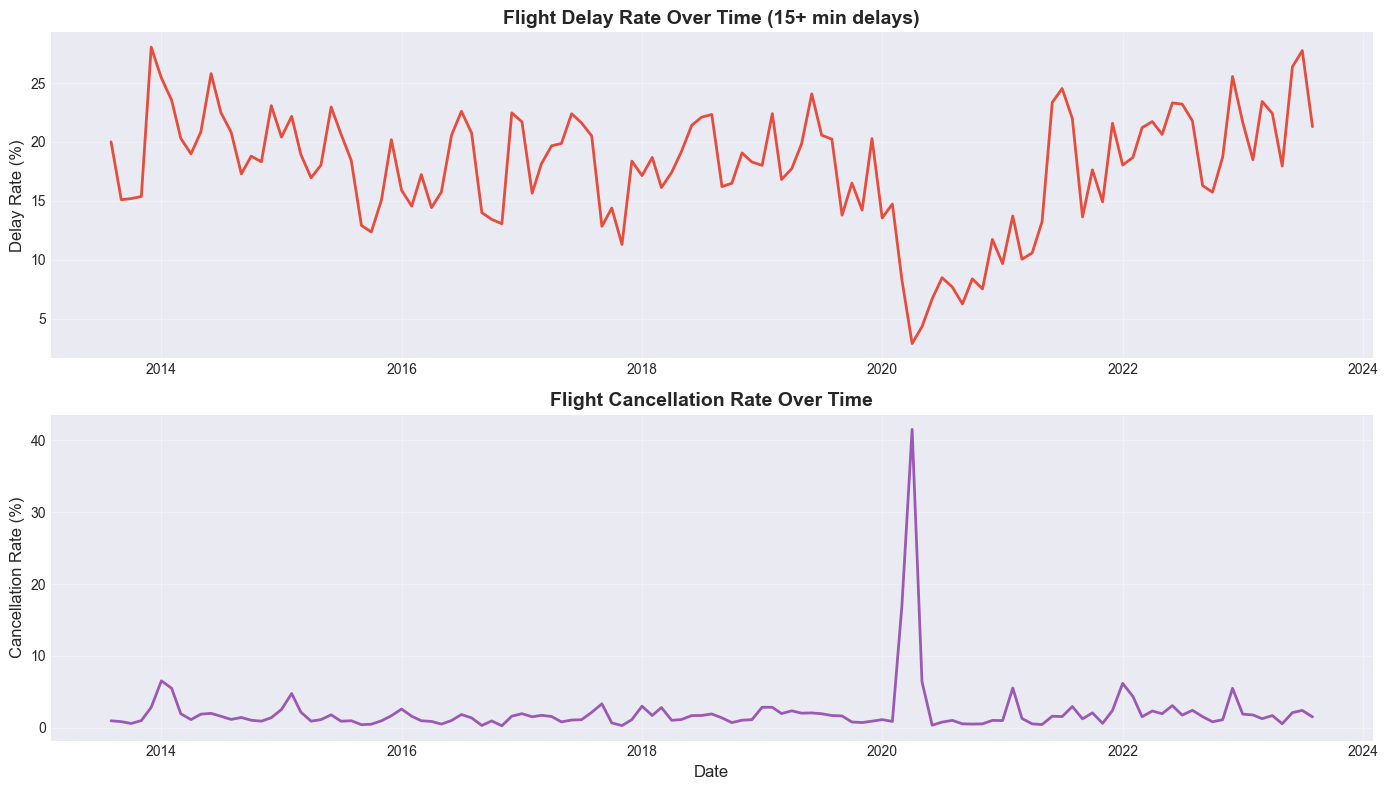


📊 Average Delay Rate: 17.84%
📊 Average Cancellation Rate: 2.18%


In [6]:
# Delay rate over time
df_delays['delay_rate'] = (df_delays['arr_del15'] / df_delays['arr_flights']) * 100

# Aggregate by year-month
delay_trend = df_delays.groupby(['year', 'month']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_cancelled': 'sum'
}).reset_index()

delay_trend['delay_rate'] = (delay_trend['arr_del15'] / delay_trend['arr_flights']) * 100
delay_trend['cancel_rate'] = (delay_trend['arr_cancelled'] / delay_trend['arr_flights']) * 100
delay_trend['date'] = pd.to_datetime(delay_trend[['year', 'month']].assign(day=1))

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Delay rate trend
axes[0].plot(delay_trend['date'], delay_trend['delay_rate'], linewidth=2, color='#e74c3c')
axes[0].set_title('Flight Delay Rate Over Time (15+ min delays)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Delay Rate (%)', fontsize=12)
axes[0].grid(alpha=0.3)

# Cancellation rate
axes[1].plot(delay_trend['date'], delay_trend['cancel_rate'], linewidth=2, color='#9b59b6')
axes[1].set_title('Flight Cancellation Rate Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Cancellation Rate (%)', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Average Delay Rate: {delay_trend['delay_rate'].mean():.2f}%")
print(f"📊 Average Cancellation Rate: {delay_trend['cancel_rate'].mean():.2f}%")

In [7]:
# Delay causes breakdown
delay_causes = df_delays[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

fig = px.pie(
    values=delay_causes.values,
    names=['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft'],
    title='Distribution of Delay Causes',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

print("\n🔍 Delay Causes Summary:")
for cause, count in delay_causes.items():
    print(f"  {cause.replace('_ct', '').replace('_', ' ').title()}: {count:,.0f} ({count/delay_causes.sum()*100:.1f}%)")


🔍 Delay Causes Summary:
  Carrier: 3,565,081 (31.3%)
  Weather: 385,768 (3.4%)
  Nas: 3,322,433 (29.2%)
  Security: 26,930 (0.2%)
  Late Aircraft: 4,074,891 (35.8%)


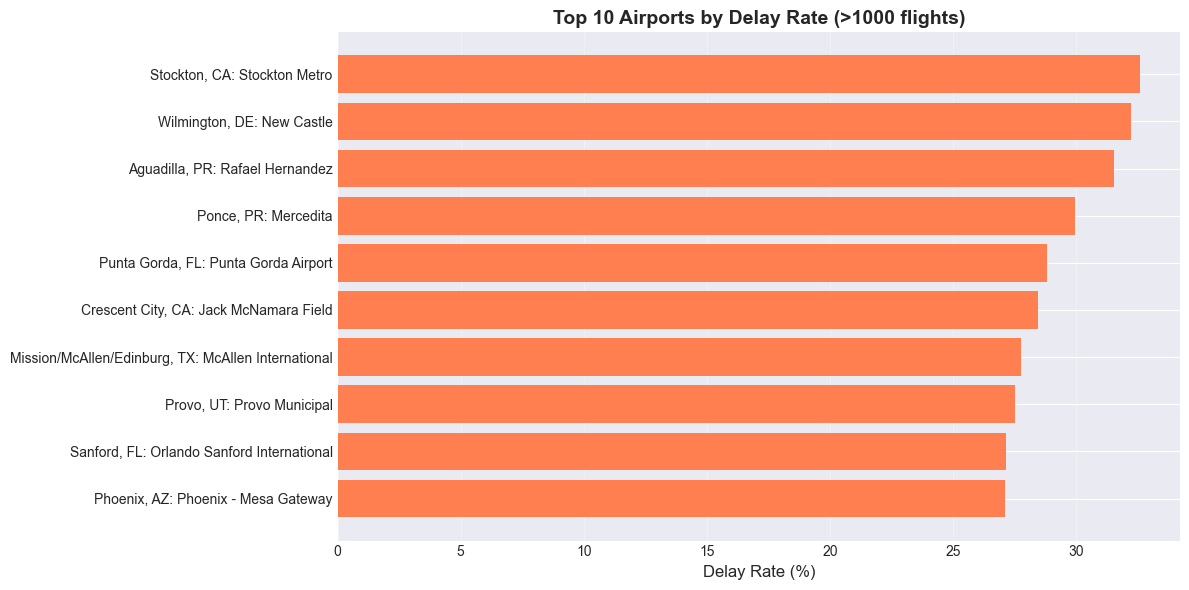

In [8]:
# Top 10 airports by delay rate
airport_delays = df_delays.groupby('airport_name').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).reset_index()

airport_delays['delay_rate'] = (airport_delays['arr_del15'] / airport_delays['arr_flights']) * 100
airport_delays = airport_delays[airport_delays['arr_flights'] > 1000]  # Filter low-traffic airports
top_delayed = airport_delays.nlargest(10, 'delay_rate')

plt.figure(figsize=(12, 6))
plt.barh(top_delayed['airport_name'], top_delayed['delay_rate'], color='coral')
plt.xlabel('Delay Rate (%)', fontsize=12)
plt.title('Top 10 Airports by Delay Rate (>1000 flights)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 4.2 Flight Pricing Analysis

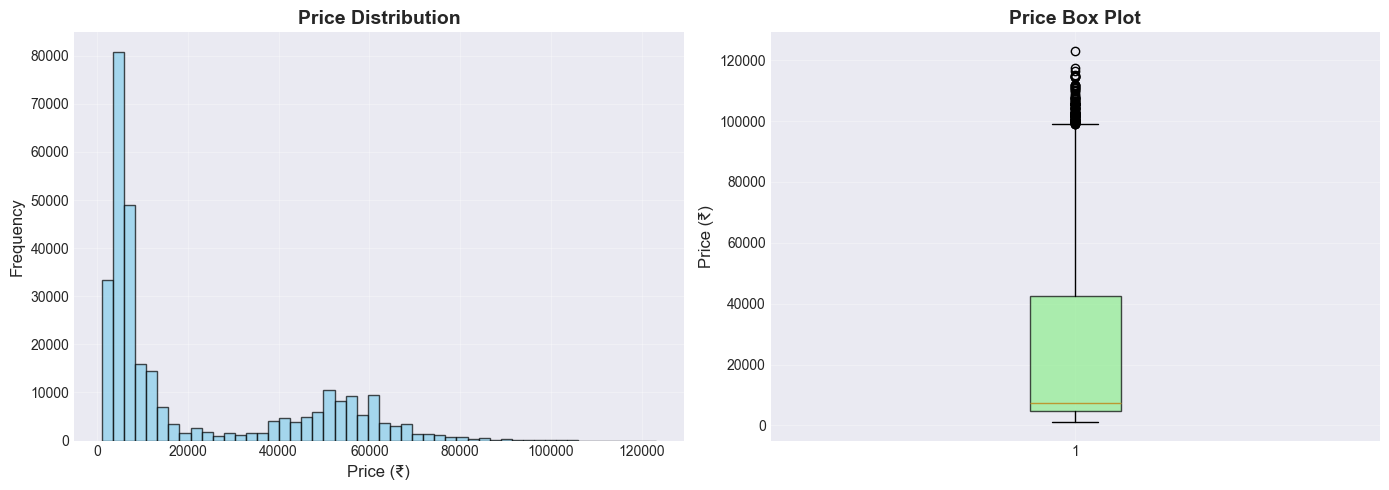


💰 Price Statistics:
  Mean: ₹20,890
  Median: ₹7,425
  Std Dev: ₹22,698


In [9]:
# Price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_pricing['price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (₹)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df_pricing['price'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[1].set_title('Price Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price (₹)', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💰 Price Statistics:")
print(f"  Mean: ₹{df_pricing['price'].mean():,.0f}")
print(f"  Median: ₹{df_pricing['price'].median():,.0f}")
print(f"  Std Dev: ₹{df_pricing['price'].std():,.0f}")

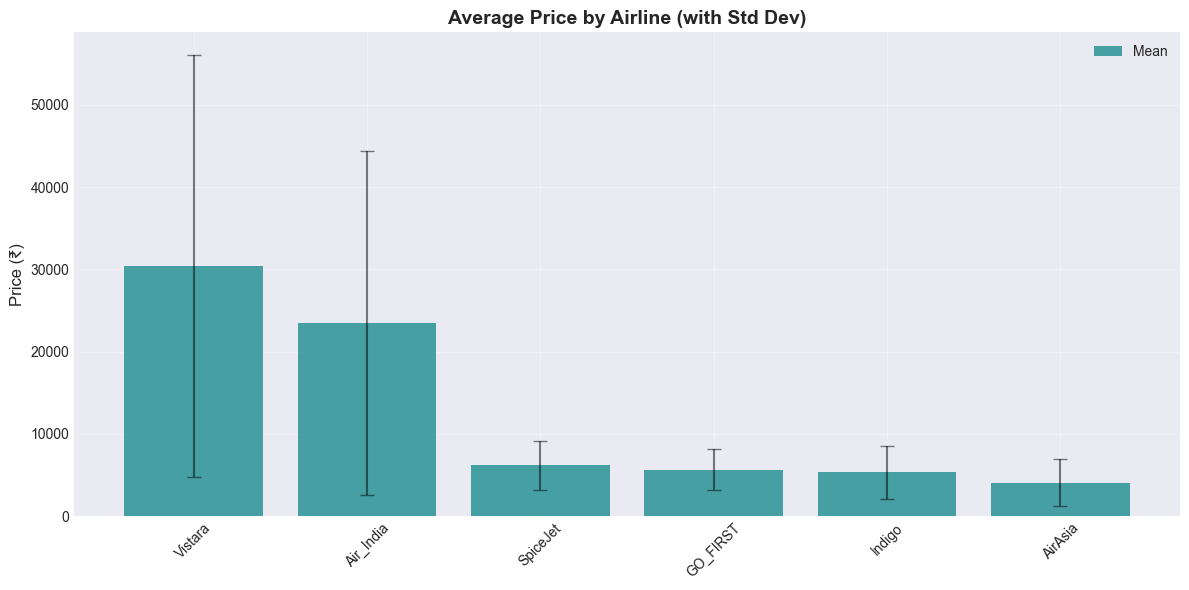

In [10]:
# Price by airline
airline_prices = df_pricing.groupby('airline')['price'].agg(['mean', 'median', 'std']).reset_index()
airline_prices = airline_prices.sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
x = range(len(airline_prices))
plt.bar(x, airline_prices['mean'], color='teal', alpha=0.7, label='Mean')
plt.errorbar(x, airline_prices['mean'], yerr=airline_prices['std'], 
             fmt='none', color='black', alpha=0.5, capsize=5)
plt.xticks(x, airline_prices['airline'], rotation=45)
plt.ylabel('Price (₹)', fontsize=12)
plt.title('Average Price by Airline (with Std Dev)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

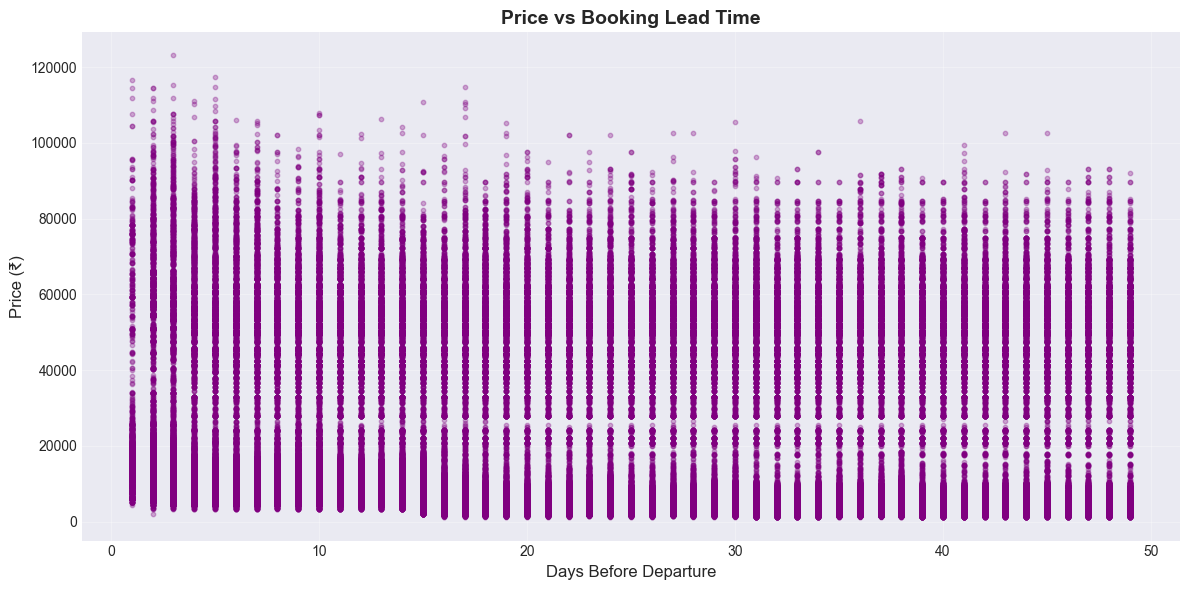


🔗 Correlation Matrix:


,days_left,price,duration
days_left,1.000000,-0.091949,-0.039157
price,-0.091949,1.000000,0.204222
duration,-0.039157,0.204222,1.000000


In [11]:
# Price vs Days Left (booking lead time)
plt.figure(figsize=(12, 6))
plt.scatter(df_pricing['days_left'], df_pricing['price'], alpha=0.3, s=10, color='purple')
plt.xlabel('Days Before Departure', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.title('Price vs Booking Lead Time', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation
correlation = df_pricing[['days_left', 'price', 'duration']].corr()
print("\n🔗 Correlation Matrix:")
display(correlation)

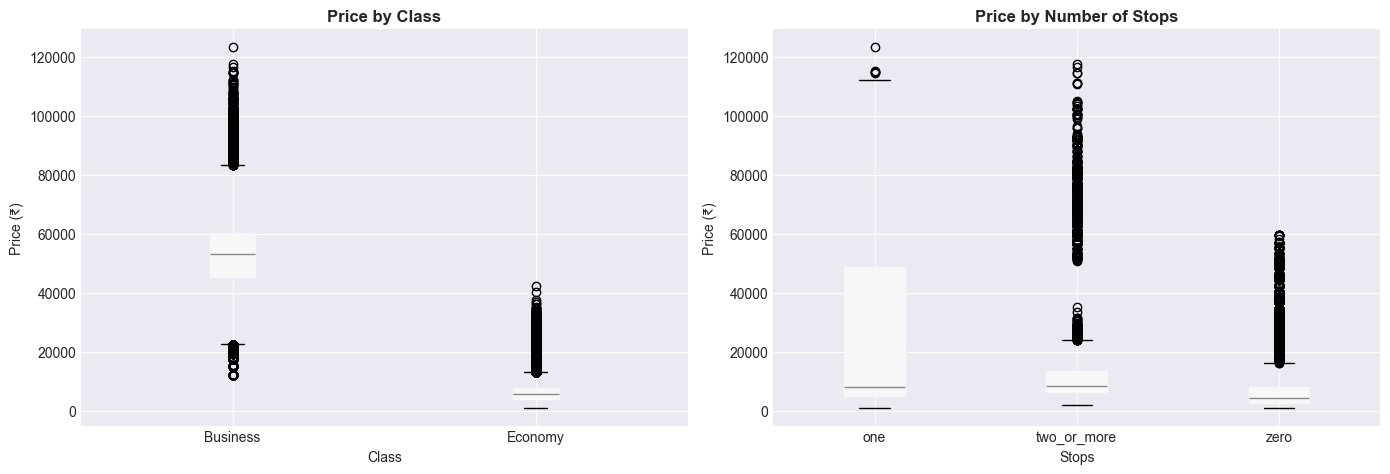

In [12]:
# Price by class and stops
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# By class
df_pricing.boxplot(column='price', by='class', ax=axes[0], patch_artist=True)
axes[0].set_title('Price by Class', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=10)
axes[0].set_ylabel('Price (₹)', fontsize=10)
plt.sca(axes[0])
plt.xticks(rotation=0)

# By stops
df_pricing.boxplot(column='price', by='stops', ax=axes[1], patch_artist=True)
axes[1].set_title('Price by Number of Stops', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Stops', fontsize=10)
axes[1].set_ylabel('Price (₹)', fontsize=10)

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

### 4.3 Passenger Volume Analysis

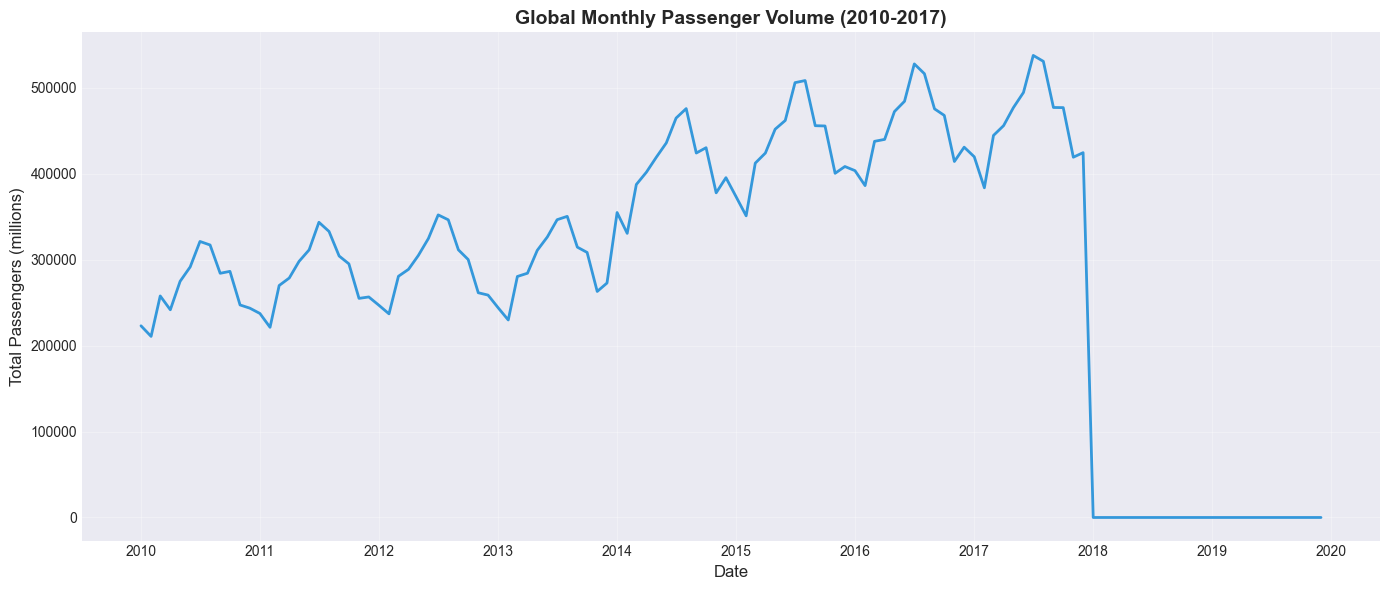


✈️ Total Passengers Over Period: 34,744,191M
📈 Average Monthly Growth: 0.01%


In [13]:
# Time series of total passengers (aggregate across countries)
passenger_trend = df_passengers.groupby(['Year', 'Month'])['Total_OS'].sum().reset_index()
passenger_trend['date'] = pd.to_datetime(passenger_trend[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(14, 6))
plt.plot(passenger_trend['date'], passenger_trend['Total_OS'], linewidth=2, color='#3498db')
plt.title('Global Monthly Passenger Volume (2010-2017)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Passengers (millions)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✈️ Total Passengers Over Period: {passenger_trend['Total_OS'].sum():,.0f}M")
print(f"📈 Average Monthly Growth: {passenger_trend['Total_OS'].pct_change().mean()*100:.2f}%")

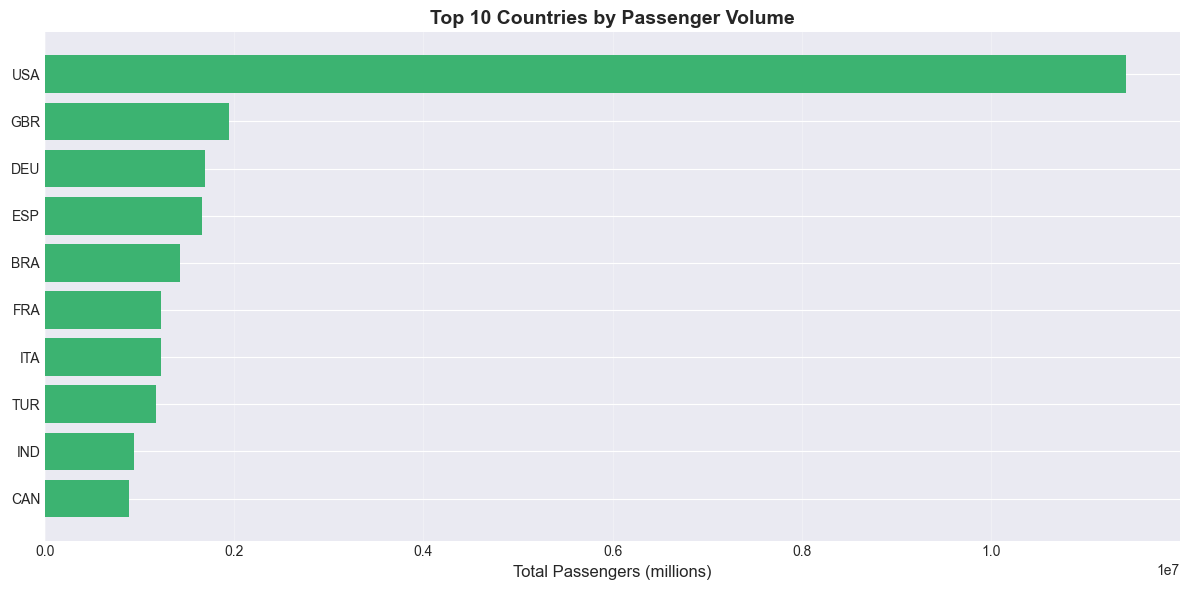

In [14]:
# Top 10 countries by passenger volume
country_passengers = df_passengers.groupby('ISO3')['Total_OS'].sum().reset_index()
country_passengers = country_passengers.sort_values('Total_OS', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(country_passengers['ISO3'], country_passengers['Total_OS'], color='mediumseagreen')
plt.xlabel('Total Passengers (millions)', fontsize=12)
plt.title('Top 10 Countries by Passenger Volume', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

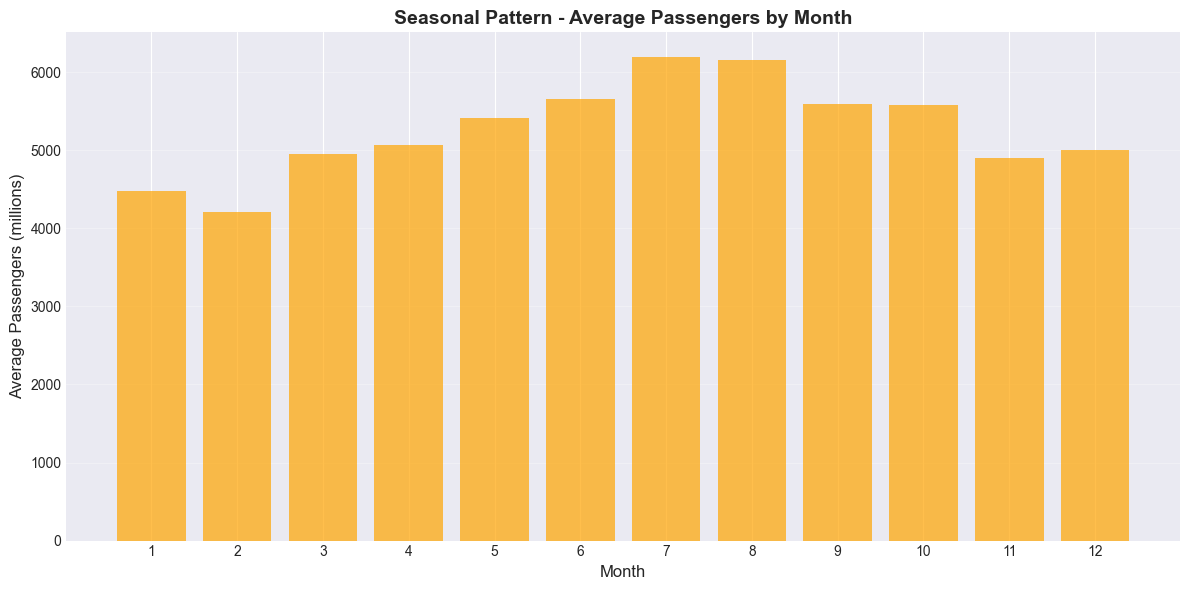


📅 Seasonality Insights:
  Peak Month: 7 (Month 7)
  Lowest Month: 2 (Month 2)


In [15]:
# Seasonality analysis
monthly_avg = df_passengers.groupby('Month')['Total_OS'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(monthly_avg['Month'], monthly_avg['Total_OS'], color='orange', alpha=0.7)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Passengers (millions)', fontsize=12)
plt.title('Seasonal Pattern - Average Passengers by Month', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📅 Seasonality Insights:")
print(f"  Peak Month: {monthly_avg.loc[monthly_avg['Total_OS'].idxmax(), 'Month']} (Month {monthly_avg['Month'].iloc[monthly_avg['Total_OS'].idxmax()]})")
print(f"  Lowest Month: {monthly_avg.loc[monthly_avg['Total_OS'].idxmin(), 'Month']} (Month {monthly_avg['Month'].iloc[monthly_avg['Total_OS'].idxmin()]})")

### 4.4 Airport Geographic Distribution

In [16]:
# Interactive map of airports
fig = px.scatter_geo(
    df_airports,
    lat='LATITUDE',
    lon='LONGITUDE',
    hover_name='AIRPORT',
    hover_data=['CITY', 'STATE'],
    title='US Airport Locations',
    size_max=10
)
fig.update_geos(scope='usa')
fig.update_layout(height=600)
fig.show()

print(f"\n📍 Geographic Coverage:")
print(f"  States: {df_airports['STATE'].nunique()}")
print(f"  Latitude Range: {df_airports['LATITUDE'].min():.2f}° to {df_airports['LATITUDE'].max():.2f}°")
print(f"  Longitude Range: {df_airports['LONGITUDE'].min():.2f}° to {df_airports['LONGITUDE'].max():.2f}°")


📍 Geographic Coverage:
  States: 54
  Latitude Range: 13.48° to 71.29°
  Longitude Range: -176.65° to -64.80°


### 4.5 Weather Data Distribution

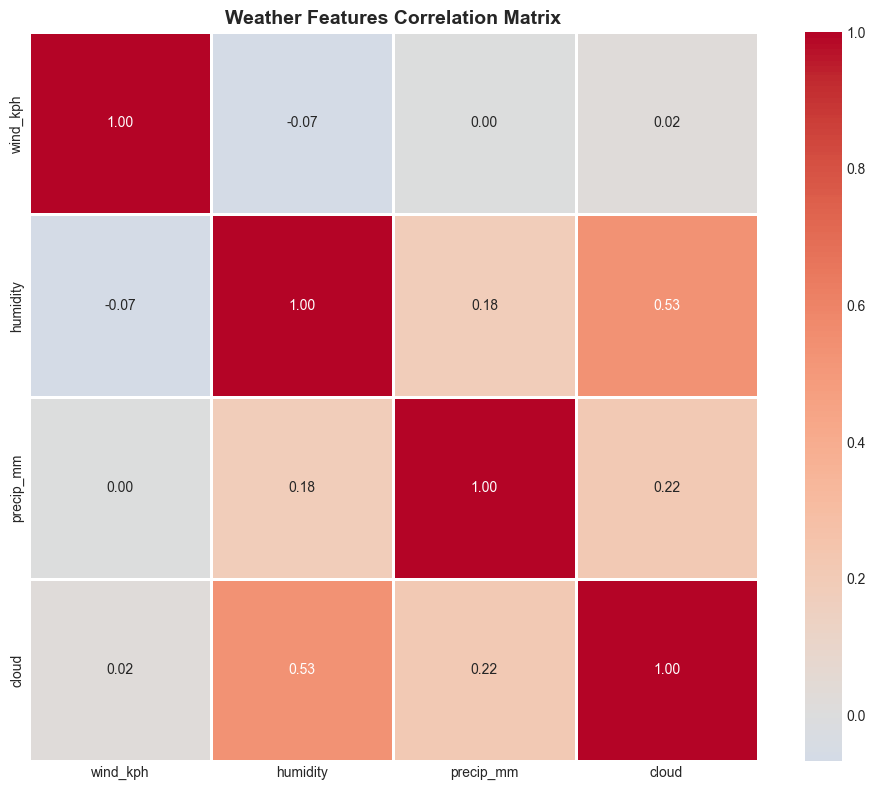

In [17]:
# Weather features correlation
weather_cols = ['temp_c', 'wind_kph', 'humidity', 'precip_mm', 'cloud', 'vis_km']
weather_available = [col for col in weather_cols if col in df_weather.columns]

if weather_available:
    plt.figure(figsize=(10, 8))
    corr_matrix = df_weather[weather_available].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, fmt='.2f')
    plt.title('Weather Features Correlation Matrix', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Weather feature columns not found with expected names")
    print(f"Available columns: {df_weather.columns.tolist()[:10]}...")

## 5. Key Insights & Recommendations

### Data Quality Summary
1. **Airline Delay Causes**: Clean dataset with minimal missing values, ready for modeling
2. **Flight Pricing**: Complete data, strong candidate for regression tasks
3. **Monthly Passengers**: Significant missing values in Total/Domestic/International, use Total_OS column
4. **Weather Data**: Rich features but temporal alignment needed with flight data

### Deep Learning Targets Identified
1. ✅ **Flight Delay Classification** - Binary (delayed/on-time) and multi-class (delay cause)
2. ✅ **Price Prediction** - Regression with clear features and target
3. ✅ **Passenger Forecasting** - Time series with strong seasonal patterns
4. ✅ **Airport Network Analysis** - Graph structure with geographic coordinates

### Next Steps
- **Notebook 02**: Data preprocessing, feature engineering, and dataset merging
- **Notebook 03**: Build baseline delay prediction models
- **Notebook 04**: Implement price forecasting with embeddings
- **Notebook 05**: Advanced architectures (TabNet, Transformers)

In [18]:
print("\n" + "="*80)
print("✅ EXPLORATION COMPLETE!")
print("="*80)
print("\nDatasets are ready for preprocessing and modeling.")
print("Proceed to: 02_data_preprocessing.ipynb")


✅ EXPLORATION COMPLETE!

Datasets are ready for preprocessing and modeling.
Proceed to: 02_data_preprocessing.ipynb
